In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import thinkstats2

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)


ModuleNotFoundError: No module named 'yfinance'

<h1>Time Series</h1>

The regression analysis we've done have the same basic format - we know some stuff (X values), and we will use that stuff to predict what we want (Y value). Time series analysis is slightly different, here we still want to make predictions for some target value, however we will use previous values for that target as our "X values". In other words, we're making predictions based on movement patterns in a value. 

Time series analysis is common with many things that move or change over time - most notably is technical analysis in stock markets. Technical analysis attempts to predict the price of stocks based on patterns in the stock price movement, rather than by looking at company fundamentals like earnings, sales, or growth. In other traded commodities like gas prices, corn futures, or gold values, time series analysis is also common. 

<h3>Moving Averages</h3>

The basis of time series analysis is a moving average - or taking the previous N values, averaging them together, and using that as a prediction for "next time". We looked at this when we started examining error a few weeks ago. 

In [65]:
#Get some data
tsla = yf.Ticker("TSLA")
c = yf.Ticker("C")
aapl = yf.Ticker("AAPL")
itc = yf.Ticker("ITC")
a = yf.Ticker("A")

In [66]:
#Download some ticker history
d_tsla = tsla.history(start="2017-01-01", end="2021-11-01", index_col="Date")
d_c = c.history(start="2017-01-01", end="2021-11-01", index_col="Date")
d_aapl = aapl.history(start="2017-01-01", end="2021-11-01", index_col="Date")
d_a = a.history(start="2017-01-01", end="2021-11-01", index_col="Date", infer_datetime_format=True)
d_tsla.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,29616500,0,0.0
2017-01-04,42.950001,45.599998,42.862000,45.397999,56067500,0,0.0
2017-01-05,45.284000,45.495998,44.389999,45.349998,29558500,0,0.0
2017-01-06,45.386002,46.062000,45.090000,45.801998,27639500,0,0.0
2017-01-09,45.793999,46.383999,45.599998,46.256001,19897500,0,0.0
2017-01-10,46.400002,46.400002,45.377998,45.973999,18300000,0,0.0
2017-01-11,45.813999,45.995998,45.335999,45.945999,18254000,0,0.0
2017-01-12,45.812000,46.139999,45.116001,45.917999,18951000,0,0.0
2017-01-13,46.000000,47.570000,45.917999,47.549999,30465000,0,0.0


<AxesSubplot:xlabel='Date', ylabel='Close'>

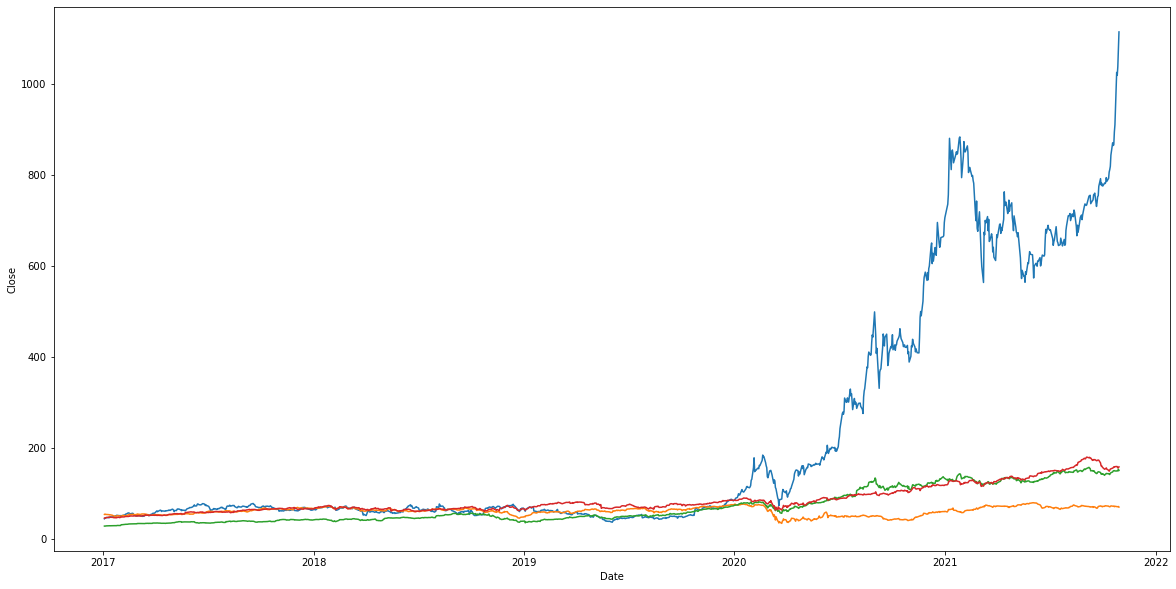

In [67]:
sns.lineplot(data=d_tsla, x="Date", y="Close")
sns.lineplot(data=d_c, x="Date", y="Close")
sns.lineplot(data=d_aapl, x="Date", y="Close")
sns.lineplot(data=d_a, x="Date", y="Close")

<h3>Stock Charts - Cool</h3>

Ok, simple analysis time - moving averages...

The most simple type of prediction that we can make is a moving/rolling average - a moving average makes a prediction by averaging together the previous X values. We did this with gas prices when we explored the RMSE. 

In [68]:
d_tsla.head(11)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,29616500,0,0.0
2017-01-04,42.950001,45.599998,42.862000,45.397999,56067500,0,0.0
2017-01-05,45.284000,45.495998,44.389999,45.349998,29558500,0,0.0
2017-01-06,45.386002,46.062000,45.090000,45.801998,27639500,0,0.0
2017-01-09,45.793999,46.383999,45.599998,46.256001,19897500,0,0.0
2017-01-10,46.400002,46.400002,45.377998,45.973999,18300000,0,0.0
2017-01-11,45.813999,45.995998,45.335999,45.945999,18254000,0,0.0
2017-01-12,45.812000,46.139999,45.116001,45.917999,18951000,0,0.0
2017-01-13,46.000000,47.570000,45.917999,47.549999,30465000,0,0.0


In [69]:
#Rolling average
interval = 10
rollTsla = d_tsla["Close"].rolling(interval, closed="left").mean()
rollTsla.head(11)

Date
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06          NaN
2017-01-09          NaN
2017-01-10          NaN
2017-01-11          NaN
2017-01-12          NaN
2017-01-13          NaN
2017-01-17          NaN
2017-01-18    45.870799
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date', ylabel='Close'>

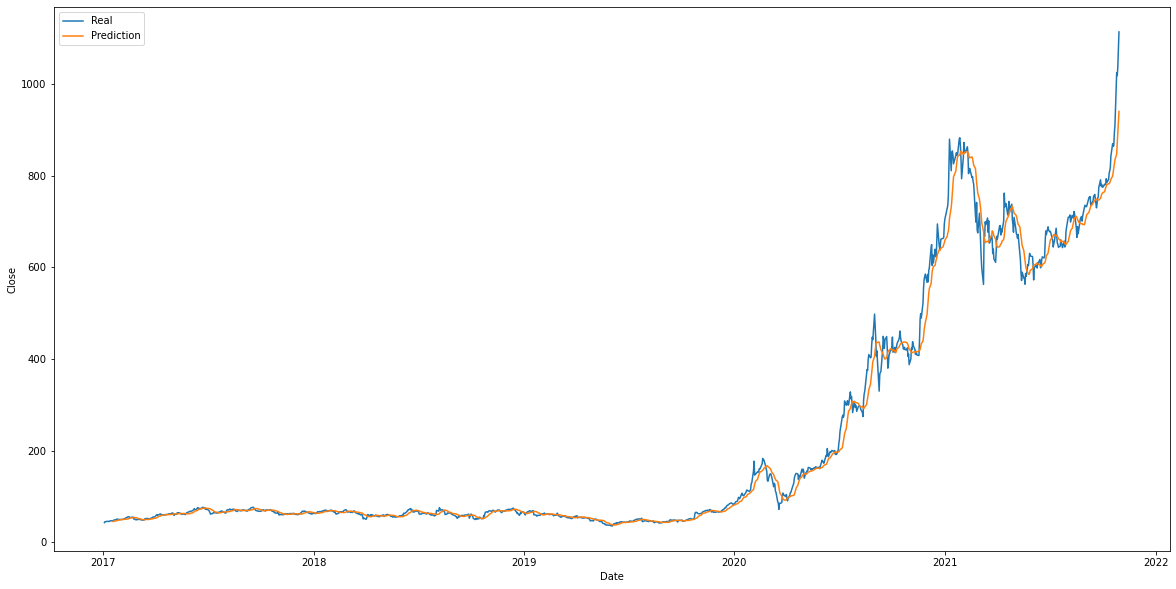

In [70]:
sns.lineplot(data=d_tsla, x="Date", y="Close", label="Real")
sns.lineplot(data=rollTsla, label="Prediction")

As expected, the rolling average follows the real price. If we cut down on the interval, we get a model that is responsive, and changes quickly. If we increase the interval, we get a model that is more stable and smooth. 



In [71]:
#Calculate accuracy
#We need to ensure that we cut out the nans, so we don't start the caclulation until predictions are made
mean_squared_error(d_tsla["Close"][interval:], rollTsla[interval:], squared=False)

24.972618178397262

If we are particularly keen, we could try a whole bunch of different intervals, and see which is most accurate. 

In [72]:
def rollingTest(data, columnName, minRange, maxRange):
    errors = []
    i = minRange
    while i < maxRange:
        roll = data[columnName].rolling(i, closed="left").mean()
        err = mean_squared_error(data[columnName][i:], roll[i:], squared=False)
        errors.append((i,err))
        i += 1
    return errors
        

In [73]:
tmp = rollingTest(d_tsla, "Close", 5, 10)
print(tmp)
#We can also sort the results to see the best. 
tmp2 = sorted(tmp, key=lambda x: x[1])
print(tmp2)

[(5, 18.43404200891322), (6, 19.87349698893398), (7, 21.2341532656254), (8, 22.50392917532948), (9, 23.728896663312334)]
[(5, 18.43404200891322), (6, 19.87349698893398), (7, 21.2341532656254), (8, 22.50392917532948), (9, 23.728896663312334)]


We can create a big loop that tries each and every interval, and we can choose the most accurate one. 

More useful - what if we wanted to make a smarter average? For example, what if we averaged a bunch of values together, but we weighted the most recent ones more heavily, so they are more impactful than the older ones? 

We can make a stupid version - below will take a 4 day moving average, but the weights will be altered:
<ul>
<li>Most recent - 40% of the prediction
<li>2nd most recent - 30% of the prediction
<li>3rd most recent - 20% of the prediction
<li>4th most recent - 10% of the prediction
</ul>

In [74]:
def dumbWeighting(data, columnName):
    start = 4
    i = start
    preds = [np.nan,np.nan,np.nan,np.nan]
    while i < len(data[columnName]):
        pred = data[columnName][i-1] * .4 + data[columnName][i-2] * .3 + data[columnName][i-3] * .2 + data[columnName][i-4] * .1
        preds.append(pred)
        i += 1
    data["Predictions"] = preds
    return data

In [75]:
tmp = dumbWeighting(d_tsla, "Close")
print(mean_squared_error(tmp["Close"][4:], tmp["Predictions"][4:], squared=False))
tmp.head()

14.776100026484146


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Predictions
Date,,,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,29616500,0,0.0,NaN
2017-01-04,42.950001,45.599998,42.862000,45.397999,56067500,0,0.0,NaN
2017-01-05,45.284000,45.495998,44.389999,45.349998,29558500,0,0.0,NaN
2017-01-06,45.386002,46.062000,45.090000,45.801998,27639500,0,0.0,NaN
2017-01-09,45.793999,46.383999,45.599998,46.256001,19897500,0,0.0,45.345198


<AxesSubplot:xlabel='Date', ylabel='Close'>

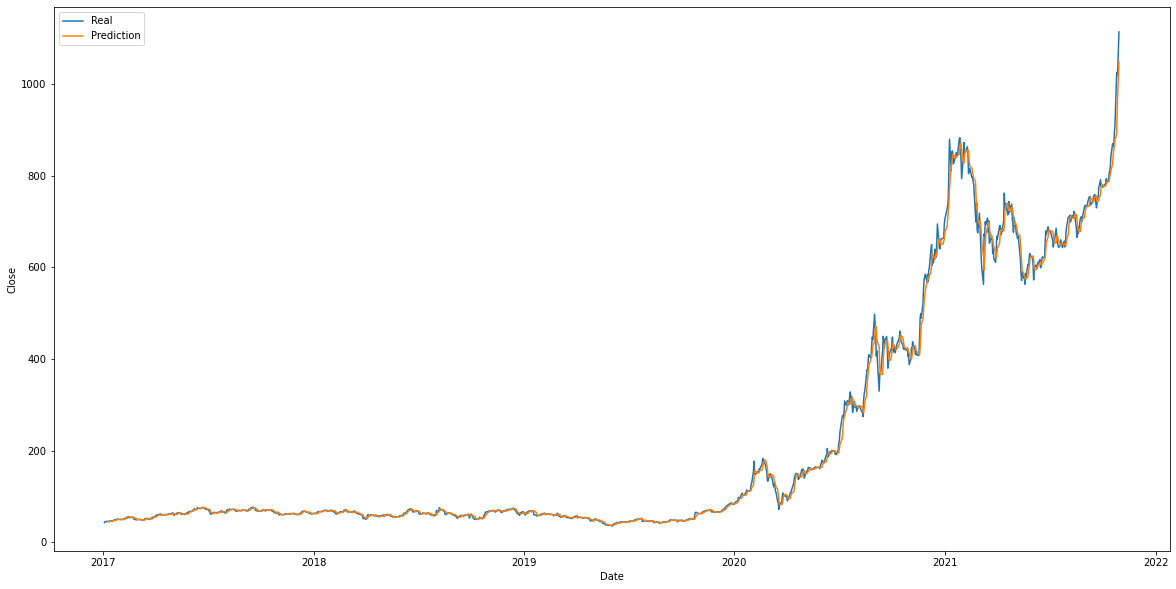

In [76]:
#Visualize
sns.lineplot(data=tmp, x="Date", y="Close", label="Real")
sns.lineplot(data=tmp, x="Date", y="Predictions",label="Prediction")

Luckily, we don't need to do this by hand, it is built into pandas. 

We can try...

Date
2017-01-03    43.397999
2017-01-04    44.497999
2017-01-05    44.840497
2017-01-06    45.157269
2017-01-09    45.472685
Name: Close, dtype: float64
18.410612913927444


<AxesSubplot:xlabel='Date', ylabel='Close'>

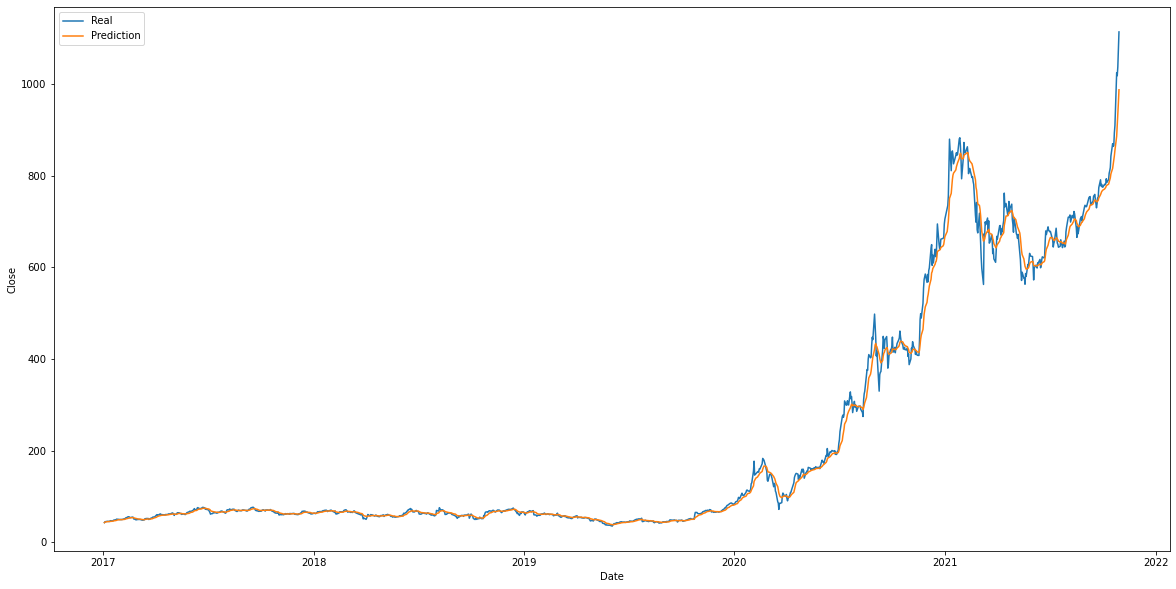

In [77]:
#Weighted Average
#NOTE - I think the book's function call is old. 
weightAvg = d_tsla["Close"].ewm(span=10).mean()
print(weightAvg.head())
print(mean_squared_error(d_tsla["Close"], weightAvg, squared=False))
#Visualize
sns.lineplot(data=d_tsla, x="Date", y="Close", label="Real")
sns.lineplot(data=weightAvg, label="Prediction")

This function does a similar thing to what we did in the dumb example, but it is a bit more flexible. In particular, you can specify how far back you want to look, and you can do so in a few ways:
<ul>
<li>Span - specify how may rows to look back. a = 2 / (span + 1)
<li>Com - as above. a = 1 / (1 + com)
<li>Halflife - specify how long (# of records) it takes for a value to be 1/2 as weighted in the calculation. a = 1 - exp( (-ln(2)) / halflife )
</ul>

Date
2017-01-03    43.397999
2017-01-04    44.432642
2017-01-05    44.759851
2017-01-06    45.048068
2017-01-09    45.324250
Name: Close, dtype: float64
34.85950170881005


<AxesSubplot:xlabel='Date', ylabel='Close'>

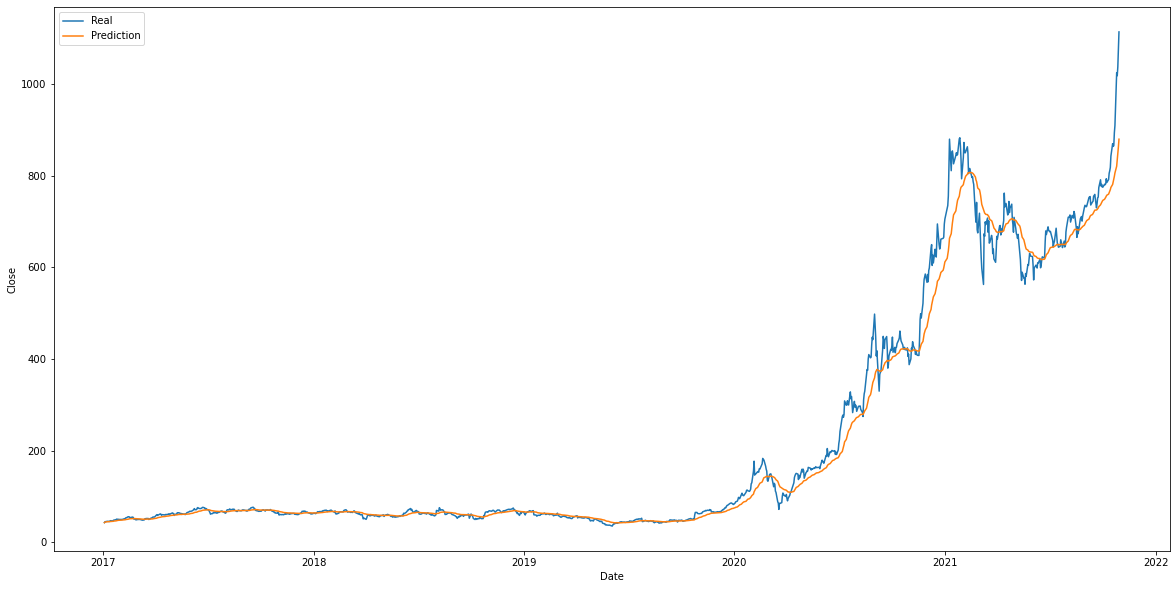

In [78]:
weightAvg = d_tsla["Close"].ewm(halflife=10).mean()
print(weightAvg.head())
print(mean_squared_error(d_tsla["Close"], weightAvg, squared=False))
#Visualize
sns.lineplot(data=d_tsla, x="Date", y="Close", label="Real")
sns.lineplot(data=weightAvg, label="Prediction")

<AxesSubplot:xlabel='Date', ylabel='Close'>

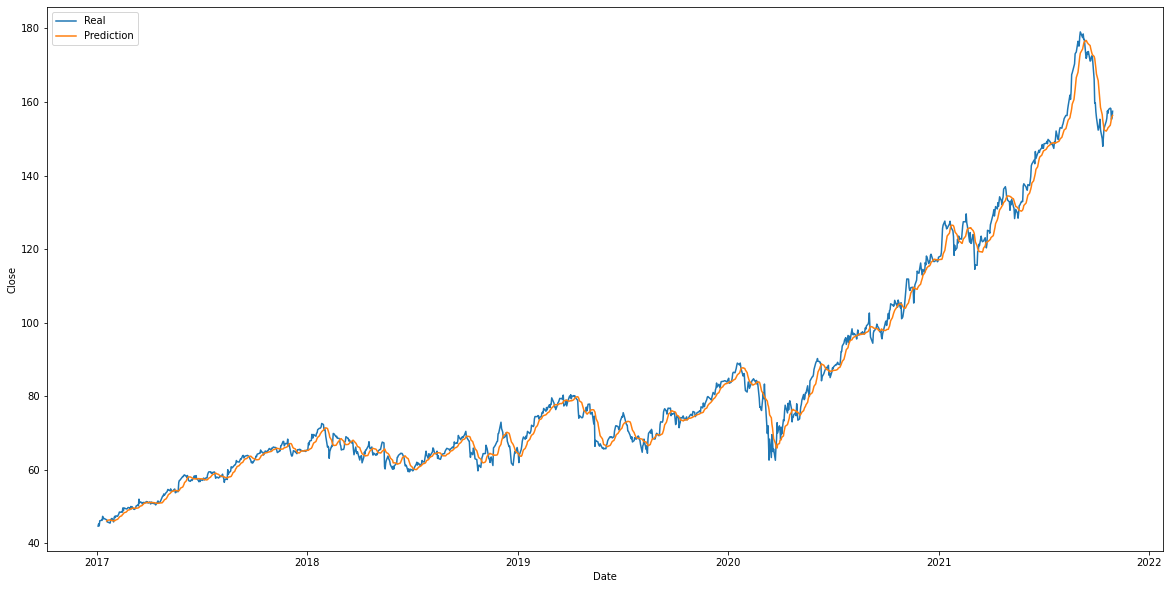

In [79]:
#Citibank 
rollA = d_a["Close"].rolling(interval, closed="left").mean()
sns.lineplot(data=d_a, x="Date", y="Close", label="Real")
sns.lineplot(data=rollA, label="Prediction")

<h2>What about the future?</h2>

The rolling averages aren't really a predictive tool. For that we need more elaborate models... 

We'll load some other data that is more illustrative. 

<h1>More Advanced Time Series Modelling and ARIMA</h1>

Going beyond simple rolling averages, we can use something called ARIMA. It is a more elaborate time series model. We'll look at the basics now, and the details next semester. ARIMA has a few parts, that we don't need to go into details about now:
<ul>
<li>AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
<li>I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
<li>MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
</ul>

This breaks down into 3 paramaters when we call it:
<ul>
<li>p: The number of lag observations included in the model, also called the lag order.
<li>d: The number of times that the raw observations are differenced, also called the degree of differencing.
<li>q: The size of the moving average window, also called the order of moving average.
</ul>

In practice, this attempts to break apart the cyclical pattern, the trend, and the average parts of a time series. Determining the correct values for these inputs is non-trivial, we need to do some analysis. For now, we'll just guess and test. One solution would be to build 3 nested loops and create trials - then calculate error and choose the best combo of varaiables. 

In [94]:
#Data
from statsmodels.tsa.arima.model import ARIMA
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_55129/524854063.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

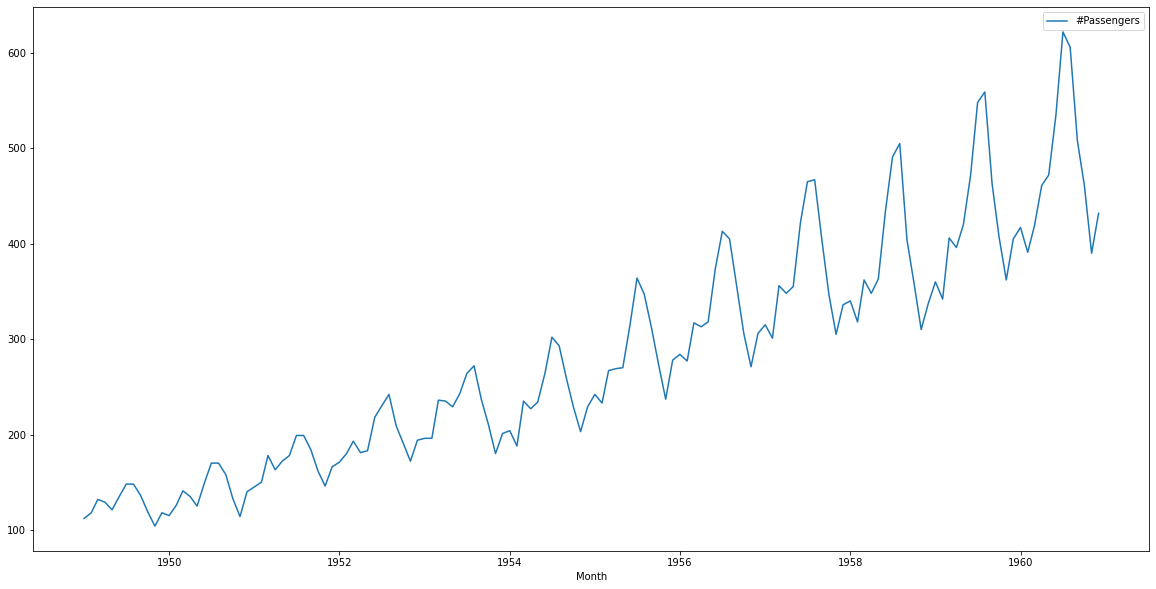

In [87]:
sns.lineplot(data=data)

Passengers per month, on a line graph. Pretty simple.

What if we want to make predictions? Just like with normal models, we fit ours (ARIMA here), then call the predict function to make predictions. 

/Users/akeems/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/akeems/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month', ylabel='predicted_mean'>

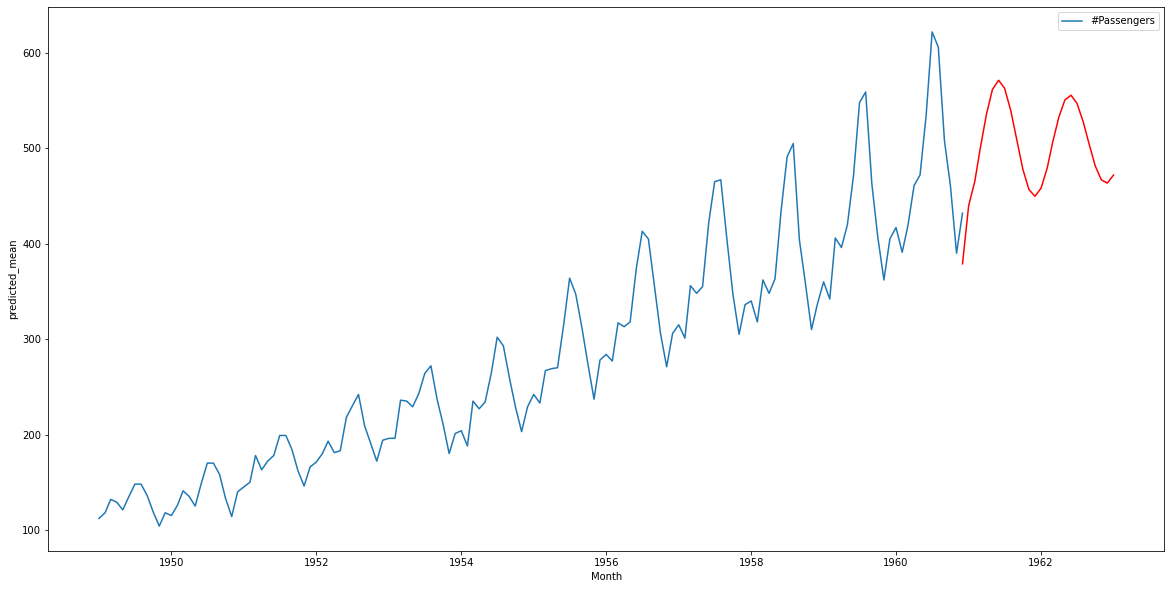

In [107]:
model = ARIMA(data, order=(2, 1, 2), freq=data.index.inferred_freq)  
results_ARIMA = model.fit()
pred = results_ARIMA.predict(start=len(data)-1, end=len(data)+24)
sns.lineplot(data=data)
sns.lineplot(data=pred, color="red")